Combine multiple molecules in RDKit

In [31]:
from rdkit import Chem
from rdkit.Chem import Draw
from functools import reduce

# SMILES strings with placeholder groups
backbone_smiles = "F[B-]1(F)OC(/C=C/[R1])=CC(/C=C/[R2])=[O+]1"
side_group1_smiles = "COc1ccc([R])c(OC)c1"
side_group2_smiles = "COc1ccc([R])cc1"

# Replace placeholders with "*" for dynamic atom ID assignment
backbone_smiles = backbone_smiles.replace("[R1]", "*").replace("[R2]", "*")
side_group1_smiles = side_group1_smiles.replace("[R]", "*")
side_group2_smiles = side_group2_smiles.replace("[R]", "*")

# Generate RDKit molecule objects
smiles_list = [backbone_smiles, side_group1_smiles, side_group2_smiles]
mols_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Function to find atom indices with wildcard ('*')
def get_wildcard_indices(mol):
    return [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetSymbol() == "*"]

# Retrieve '*' indices for the backbone and side groups
backbone_star_indices = get_wildcard_indices(mols_list[0])[:2]  # First two indices in the backbone
side1_star_index = get_wildcard_indices(mols_list[1])[0]  # Index in the first side group
side2_star_index = get_wildcard_indices(mols_list[2])[0]  # Index in the second side group

# Create an editable molecule by combining the backbone and side groups
combo = Chem.EditableMol(reduce(Chem.CombineMols, mols_list))

# Add bonds between backbone and side groups dynamically based on wildcard positions
combo.AddBond(backbone_star_indices[0], side1_star_index + mols_list[0].GetNumAtoms(), order=Chem.rdchem.BondType.SINGLE)
combo.AddBond(backbone_star_indices[1], side2_star_index + mols_list[0].GetNumAtoms() + mols_list[1].GetNumAtoms(), order=Chem.rdchem.BondType.SINGLE)

# Convert the combined molecule to SMILES
combo_smiles = Chem.MolToSmiles(combo.GetMol())

# Optionally replace '*' markers with empty space for SMILES cleanup
combo_smiles = combo_smiles.replace('*', '')
print("Combined molecule SMILES:", combo_smiles)

Combined molecule SMILES: COc1ccc(/C=C/C2=[O+][B-](F)(F)OC(/C=C/c3ccc(OC)cc3OC)=C2)cc1


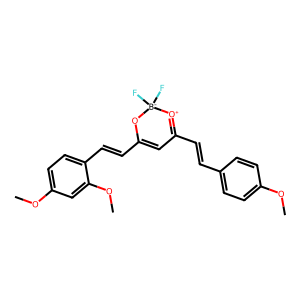

In [32]:
molecule = Chem.MolFromSmiles(combo_smiles)
Draw.MolToImage(molecule, size=(300, 300))

In [33]:
from rdkit import Chem
from rdkit.Chem import Draw

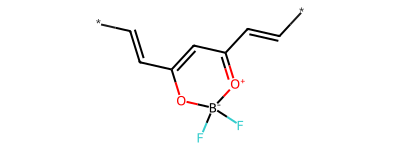

In [35]:
curcumin_backbone = "F[B-]1(F)OC(/C=C/[R1])=CC(/C=C/[R2])=[O+]1"

smiles_with_Rs = curcumin_backbone.replace("[R1]", "*").replace("[R2]", "*")
backbone = Chem.MolFromSmiles(smiles_with_Rs)
Draw.MolToImage(backbone, size=(400, 150))

In [36]:
side_groups = {
    "sidegroup01": "CC(C)C[R]",
    "sidegroup02": "CCCC[R]",
    "sidegroup03": "[R]c2ccc(C#Cc1ccccc1)cc2",
    "sidegroup04": "COc1ccc([R])cc1",
    "sidegroup05": "COc1ccccc1[R]",
    "sidegroup06": "COc1ccc([R])c(OC)c1",
    "sidegroup07": "COc1cc(OC)c([R])c(OC)c1",
    "sidegroup08": "COc1ccc(OC)c([R])c1",
    "sidegroup09": "COc1cc([R])cc(OC)c1",
    "sidegroup10": "COc1ccc([R])cc1OC",
    "sidegroup11": "CCCCCCCCOc1ccc([R])cc1OC",
    "sidegroup12": "CN(C)c1ccc([R])cc1",
    "sidegroup13": "CCCCN(CCCC)c1ccc([R])cc1",
    "sidegroup14": "CCCOc1cc(N(CC)CC)ccc1[R]",
    "sidegroup15": "N#Cc1ccc([R])cc1",
    "sidegroup16": "[R]c1ccccc1",
    "sidegroup17": "Cc1ccc([R])cc1",
    "sidegroup18": "Brc1ccc([R])cc1",
    "sidegroup19": "CSc1ccc([R])cc1",
    "sidegroup20": "COC(=O)c1ccc([R])cc1",
    "sidegroup21": "CCCCN(CCCC)c1ccc([R])s1",
    "sidegroup22": "CN2/C(=C/[R])C(C)(C)c1ccccc12",
    "sidegroup23": "Cc2ccc(c1ccc([R])s1)s2",
    "sidegroup24": "CCCCCC(CC)c2ccc(c1ccc([R])s1)s2",
    "sidegroup25": "CCCCCCCCc2ccc(c1ccc([R])s1)s2",
    "sidegroup26": "COc1ccc([R])c2ccccc12",
    "sidegroup27": "CN(C)c1ccc([R])c2ccccc12",
    "sidegroup28": "COc2ccc1cc([R])ccc1c2",
    "sidegroup29": "[R]c2c1ccccc1cc3ccccc23",
    "sidegroup30": "Cn3c1ccccc1c2cc([R])ccc23",
    "sidegroup31": "[R]c3ccc(N(c1ccccc1)c2ccccc2)s3",
    "sidegroup32": "[R]c4ccc(n3c1ccccc1c2ccccc23)cc4",
    "sidegroup33": "[R]c3ccc(N(c1ccccc1)c2ccccc2)cc3",
    "sidegroup34": "CCCCCCCCOc3ccc(N(c1ccccc1)c2ccc([R])cc2)cc3",
    "sidegroup35": "[R]c1ccc2ccc3cccc4ccc1c2c34"
}

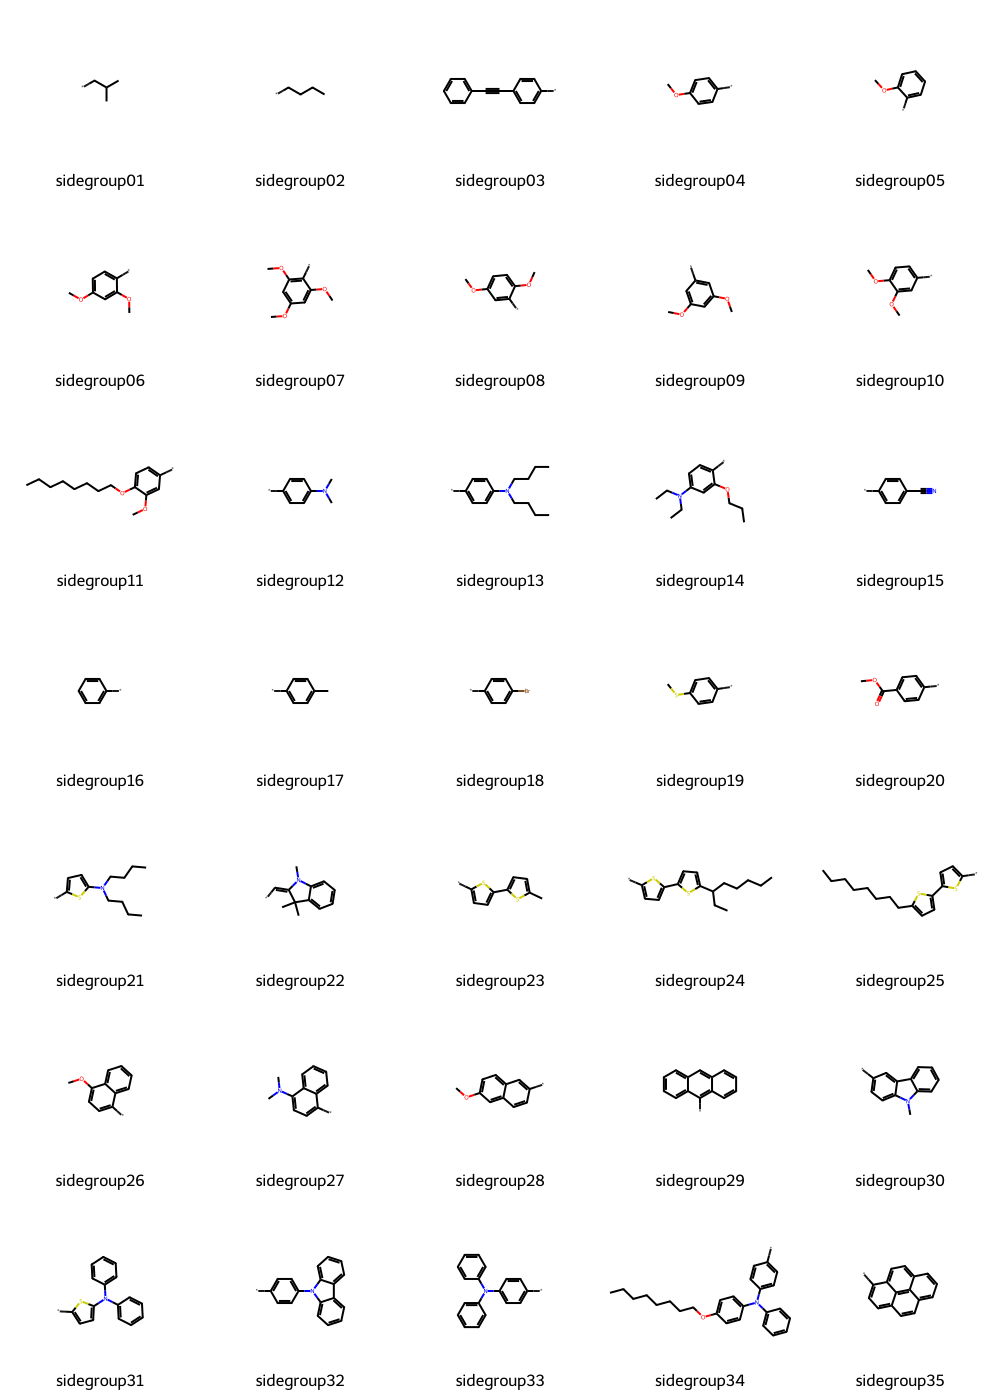

In [37]:
mols = []
labels = []

# Generate the molecules
for name, smiles in side_groups.items():
    smiles_with_R = smiles.replace("[R]", "*")
    mol = Chem.MolFromSmiles(smiles_with_R)
    if mol:
        mols.append(mol)
        labels.append(name)

# Draw the molecules
Draw.MolsToGridImage(mols, molsPerRow=5, legends=labels, subImgSize=(200, 200))

In [38]:
import pandas as pd
from rdkit import Chem
from functools import reduce

# Backbone SMILES with placeholders for R1 and R2
curcumin_backbone = "F[B-]1(F)OC(/C=C/[R1])=CC(/C=C/[R2])=[O+]1"

# List of side groups with [R] placeholder
side_groups = {
    "sidegroup01": "CC(C)C[R]",
    "sidegroup02": "CCCC[R]",
    "sidegroup03": "[R]c2ccc(C#Cc1ccccc1)cc2",
    "sidegroup04": "COc1ccc([R])cc1",
    "sidegroup05": "COc1ccccc1[R]",
    "sidegroup06": "COc1ccc([R])c(OC)c1",
    "sidegroup07": "COc1cc(OC)c([R])c(OC)c1",
    "sidegroup08": "COc1ccc(OC)c([R])c1",
    "sidegroup09": "COc1cc([R])cc(OC)c1",
    "sidegroup10": "COc1ccc([R])cc1OC",
    "sidegroup11": "CCCCCCCCOc1ccc([R])cc1OC",
    "sidegroup12": "CN(C)c1ccc([R])cc1",
    "sidegroup13": "CCCCN(CCCC)c1ccc([R])cc1",
    "sidegroup14": "CCCOc1cc(N(CC)CC)ccc1[R]",
    "sidegroup15": "N#Cc1ccc([R])cc1",
    "sidegroup16": "[R]c1ccccc1",
    "sidegroup17": "Cc1ccc([R])cc1",
    "sidegroup18": "Brc1ccc([R])cc1",
    "sidegroup19": "CSc1ccc([R])cc1",
    "sidegroup20": "COC(=O)c1ccc([R])cc1",
    "sidegroup21": "CCCCN(CCCC)c1ccc([R])s1",
    "sidegroup22": "CN2/C(=C/[R])C(C)(C)c1ccccc12",
    "sidegroup23": "Cc2ccc(c1ccc([R])s1)s2",
    "sidegroup24": "CCCCCC(CC)c2ccc(c1ccc([R])s1)s2",
    "sidegroup25": "CCCCCCCCc2ccc(c1ccc([R])s1)s2",
    "sidegroup26": "COc1ccc([R])c2ccccc12",
    "sidegroup27": "CN(C)c1ccc([R])c2ccccc12",
    "sidegroup28": "COc2ccc1cc([R])ccc1c2",
    "sidegroup29": "[R]c2c1ccccc1cc3ccccc23",
    "sidegroup30": "Cn3c1ccccc1c2cc([R])ccc23",
    "sidegroup31": "[R]c3ccc(N(c1ccccc1)c2ccccc2)s3",
    "sidegroup32": "[R]c4ccc(n3c1ccccc1c2ccccc23)cc4",
    "sidegroup33": "[R]c3ccc(N(c1ccccc1)c2ccccc2)cc3",
    "sidegroup34": "CCCCCCCCOc3ccc(N(c1ccccc1)c2ccc([R])cc2)cc3",
    "sidegroup35": "[R]c1ccc2ccc3cccc4ccc1c2c34"
}

# Replace placeholders in the backbone
curcumin_backbone = curcumin_backbone.replace("[R1]", "*").replace("[R2]", "*")

# Function to find atom indices with wildcard ('*')
def get_wildcard_indices(mol):
    return [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetSymbol() == "*"]

# Prepare DataFrame to store results
results = []

# Loop over all possible combinations of side groups
for sg1_name, sg1_smiles in side_groups.items():
    for sg2_name, sg2_smiles in side_groups.items():
        # Replace placeholders in side group SMILES with "*"
        sg1_smiles = sg1_smiles.replace("[R]", "*")
        sg2_smiles = sg2_smiles.replace("[R]", "*")

        # Generate RDKit molecule objects
        smiles_list = [curcumin_backbone, sg1_smiles, sg2_smiles]
        mols_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

        # Retrieve '*' indices for the backbone and side groups
        backbone_star_indices = get_wildcard_indices(mols_list[0])[:2]  # First two indices in the backbone
        side1_star_index = get_wildcard_indices(mols_list[1])[0]  # Index in the first side group
        side2_star_index = get_wildcard_indices(mols_list[2])[0]  # Index in the second side group

        # Create an editable molecule by combining the backbone and side groups
        combo = Chem.EditableMol(reduce(Chem.CombineMols, mols_list))

        # Add bonds between backbone and side groups dynamically based on wildcard positions
        combo.AddBond(backbone_star_indices[0], side1_star_index + mols_list[0].GetNumAtoms(), order=Chem.rdchem.BondType.SINGLE)
        combo.AddBond(backbone_star_indices[1], side2_star_index + mols_list[0].GetNumAtoms() + mols_list[1].GetNumAtoms(), order=Chem.rdchem.BondType.SINGLE)

        # Convert the combined molecule to SMILES
        combo_smiles = Chem.MolToSmiles(combo.GetMol())

        # Optionally replace '*' markers with empty space for SMILES cleanup
        combo_smiles = combo_smiles.replace('*', '')

        # Append the result to the DataFrame
        results.append({
            "Side Group 1": sg1_name,
            "Side Group 1 SMILES": sg1_smiles,
            "Side Group 2": sg2_name,
            "Side Group 2 SMILES": sg2_smiles,
            "Combined SMILES": combo_smiles
        })

# Create the DataFrame
df = pd.DataFrame(results)
df

,Side Group 1,Side Group 1 SMILES,Side Group 2,Side Group 2 SMILES,Combined SMILES
0,sidegroup01,CC(C)C*,sidegroup01,CC(C)C*,CC(C)C/C=C/C1=CC(/C=C/CC(C)C)=[O+][B-](F)(F)O1
1,sidegroup01,CC(C)C*,sidegroup02,CCCC*,CCCC/C=C/C1=[O+][B-](F)(F)OC(/C=C/CC(C)C)=C1
2,sidegroup01,CC(C)C*,sidegroup03,*c2ccc(C#Cc1ccccc1)cc2,CC(C)C/C=C/C1=CC(/C=C/c2ccc(C#Cc3ccccc3)cc2)=[...
3,sidegroup01,CC(C)C*,sidegroup04,COc1ccc(*)cc1,COc1ccc(/C=C/C2=[O+][B-](F)(F)OC(/C=C/CC(C)C)=...
4,sidegroup01,CC(C)C*,sidegroup05,COc1ccccc1*,COc1ccccc1/C=C/C1=[O+][B-](F)(F)OC(/C=C/CC(C)C...
...,...,...,...,...,...
1220,sidegroup35,*c1ccc2ccc3cccc4ccc1c2c34,sidegroup31,*c3ccc(N(c1ccccc1)c2ccccc2)s3,F[B-]1(F)OC(/C=C/c2ccc3ccc4cccc5ccc2c3c45)=CC(...
1221,sidegroup35,*c1ccc2ccc3cccc4ccc1c2c34,sidegroup32,*c4ccc(n3c1ccccc1c2ccccc23)cc4,F[B-]1(F)OC(/C=C/c2ccc3ccc4cccc5ccc2c3c45)=CC(...
1222,sidegroup35,*c1ccc2ccc3cccc4ccc1c2c34,sidegroup33,*c3ccc(N(c1ccccc1)c2ccccc2)cc3,F[B-]1(F)OC(/C=C/c2ccc3ccc4cccc5ccc2c3c45)=CC(...
1223,sidegroup35,*c1ccc2ccc3cccc4ccc1c2c34,sidegroup34,CCCCCCCCOc3ccc(N(c1ccccc1)c2ccc(*)cc2)cc3,CCCCCCCCOc1ccc(N(c2ccccc2)c2ccc(/C=C/C3=[O+][B...


First SMILES: CCCCN(CCCC)c1ccc(/C=C/C2=[O+][B-](F)(F)OC(/C=C/c3ccc4cc(OC)ccc4c3)=C2)s1


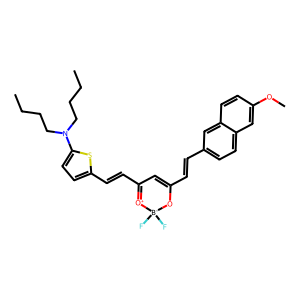

In [53]:
first_smiles = df.loc[965, "Combined SMILES"]
print("First SMILES:", first_smiles)

molecule = Chem.MolFromSmiles(first_smiles)
Draw.MolToImage(molecule, size=(300, 300))